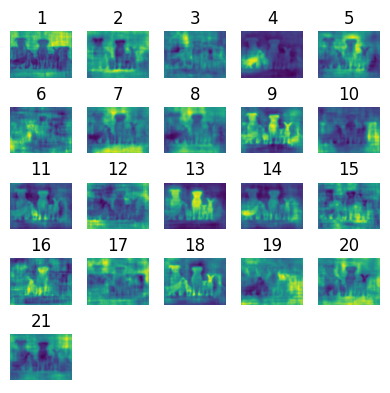

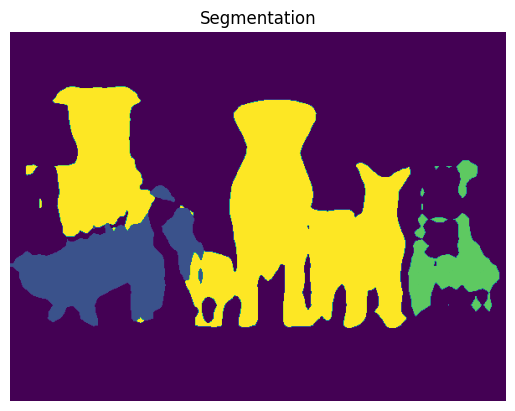

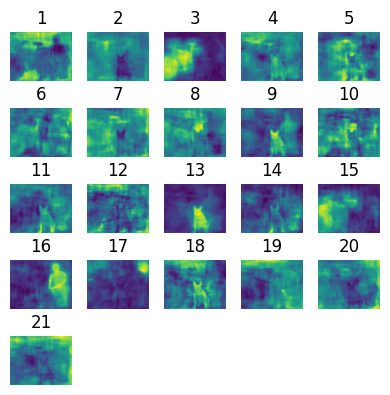

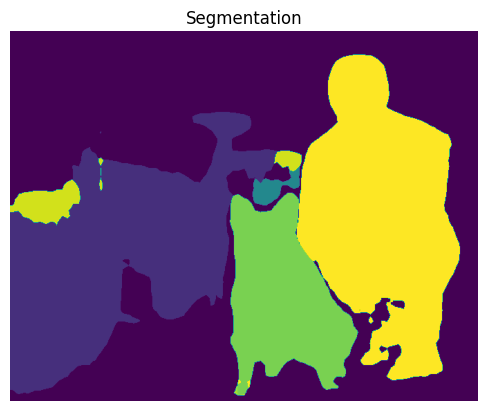

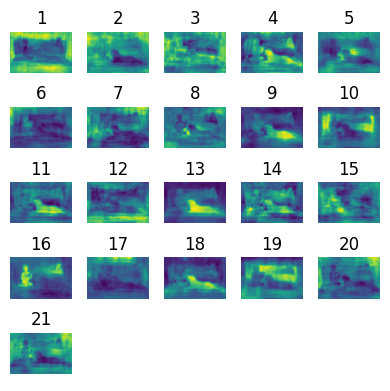

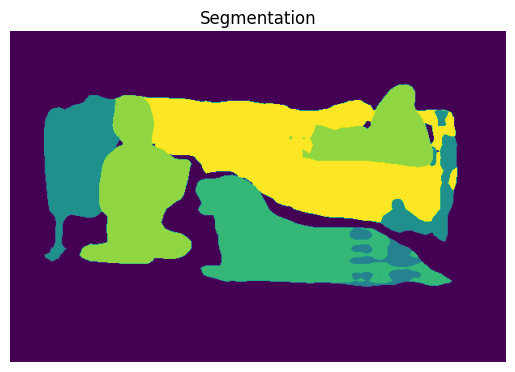

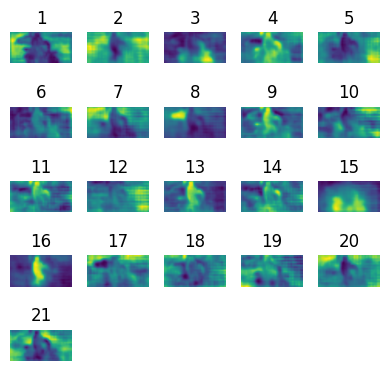

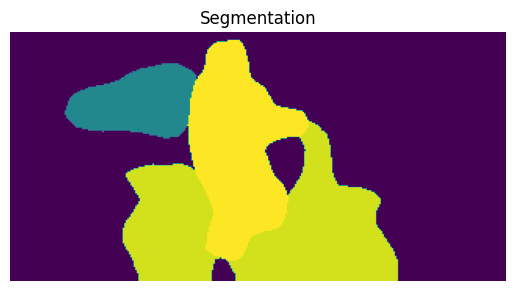

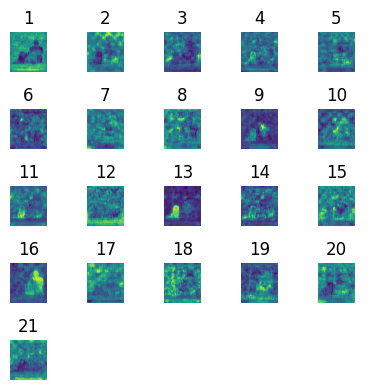

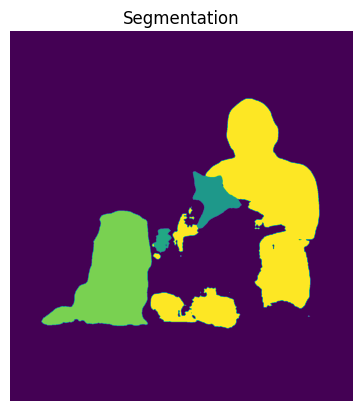

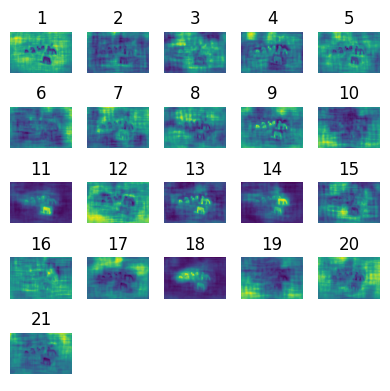

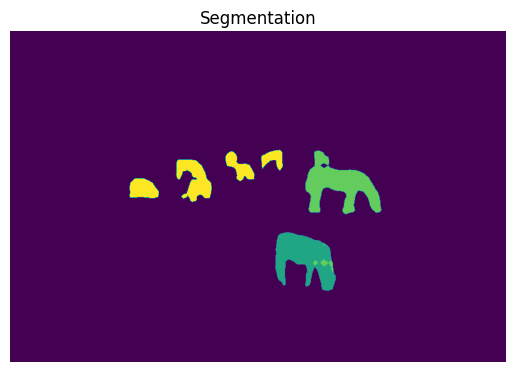

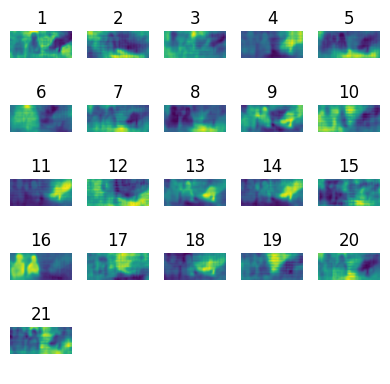

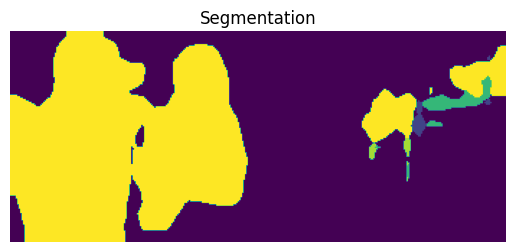

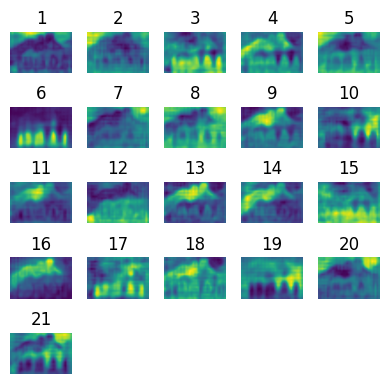

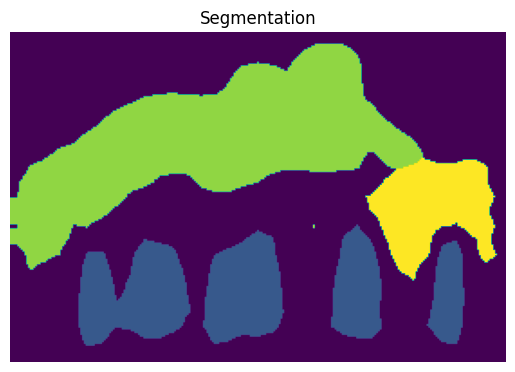

In [ ]:
import torch
from torchvision.models.segmentation import fcn_resnet50
from torchvision.transforms import functional as F
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

model = fcn_resnet50(pretrained=True).eval()

img_files = ['Cycle2.jpeg','Jallikattu.jpeg','Siddharths_dog_cycle.jpg', 'Wild.jpg','Animals.jpg','sofapersonbottle.jpeg','sofa_dog_person.jpg', 'Cat&Dog.jpg']

for img_file in img_files:
    img = Image.open(img_file).convert("RGB")
    tensor_img = F.to_tensor(img).unsqueeze(0)

    with torch.no_grad():
        model_output = model(tensor_img)['out']

    feature_maps = model_output[0].detach().cpu().numpy()

    num_feature_maps = feature_maps.shape[0]
    grid_size = int(np.ceil(np.sqrt(num_feature_maps)))

    fig, axs = plt.subplots(grid_size, grid_size, figsize=(12, 12))
    axs = axs.flatten()

    for i in range(num_feature_maps):
        axs[i].imshow(feature_maps[i], cmap='viridis')
        axs[i].axis('off')
        axs[i].set_title(f"Feature Map {i+1}")

    for j in range(num_feature_maps, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

    _, seg_pred = torch.max(model_output, 1)
    segment_img = seg_pred[0].detach().cpu().numpy()

    plt.imshow(segment_img)
    plt.axis('off')
    plt.title("Segmentation")
    plt.show()
